In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import os, sys
if '..' not in sys.path:
    sys.path.append('..')
sys.path

['c:\\Users\\Reuven\\PycharmProjects\\ProjectA\\Project_A',
 'c:\\Users\\Reuven\\.conda\\envs\\projecta\\python310.zip',
 'c:\\Users\\Reuven\\.conda\\envs\\projecta\\DLLs',
 'c:\\Users\\Reuven\\.conda\\envs\\projecta\\lib',
 'c:\\Users\\Reuven\\.conda\\envs\\projecta',
 '',
 'c:\\Users\\Reuven\\.conda\\envs\\projecta\\lib\\site-packages',
 'c:\\Users\\Reuven\\.conda\\envs\\projecta\\lib\\site-packages\\win32',
 'c:\\Users\\Reuven\\.conda\\envs\\projecta\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\Reuven\\.conda\\envs\\projecta\\lib\\site-packages\\Pythonwin',
 '..']

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import argparse
from typing import Iterable, List, Tuple, Any, Dict, Union
import mediapipe as mp


Point = Tuple[int, int]
Rect = Tuple[int, int, int, int]
Image = np.ndarray

from Project_A.utils.keyboard_segmentation import KeyboardSegmentation
from Project_A.utils.hand_segmentation import HandSegmentation
from Project_A.utils.mouse_segmentation import MouseSegmentation
from Project_A.utils.keyboard_layout import Key, Keyboard_Layout


In [60]:
keyboard_segmentation = KeyboardSegmentation()
hand_segmentation = HandSegmentation()
mouse_hand_segmentation = HandSegmentation(history_size = 1)
mouse_segmentation = MouseSegmentation()
keyboard_layout = Keyboard_Layout((keyboard_segmentation.homography_width,
                                            keyboard_segmentation.homography_height))
video_file_path = ""

In [61]:
# cap = cv2.VideoCapture(video_file_path)
cap = cv2.VideoCapture(0)
success = True
while success:
    success, image = cap.read()
    if cap is None or not cap.isOpened() or not success:
        raise IndexError(f'Unable to open video source')
    keyboard_segmentation.segment_keyboard(image)
    hand_segmentation.segment_hands(image,debug=False)
    cv2.imshow("camera image", image)
    keyboard_image = keyboard_segmentation.keyboard_image
    if keyboard_image is not None:
        cv2.imshow("Keyboard", keyboard_image)
    if hand_segmentation.identify_keyboard_click():
        try:
            index_finger = keyboard_segmentation.project_point(hand_segmentation.index_finger)
            if index_finger != keyboard_segmentation.NO_POINT:        
                key = keyboard_layout.get_key_by_index(*index_finger)
                print(key.key_name)
        except Exception as e:
            pass


KeyboardInterrupt: 

In [62]:
image_path = '../keyboard_image2.jpg'
image = cv2.imread(image_path)
keyboard_segmentation.segment_keyboard(image)

keyboard_image = keyboard_segmentation._project_keyboard_image(image, keyboard_segmentation.homography_matrix)

In [63]:
keyboard_image = keyboard_segmentation._project_keyboard_image(image, keyboard_segmentation.homography_matrix)
print(f"{keyboard_segmentation._is_keyboard_image(keyboard_image)=}")
keyboard_segmentation.red_coordinates

keyboard_segmentation._is_keyboard_image(keyboard_image)=True


[(965, 341), (325, 342), (233, 547), (1060, 548)]

Circle centered at (965, 341) with radius 5
Circle centered at (325, 342) with radius 5
Circle centered at (233, 547) with radius 5
Circle centered at (1060, 548) with radius 5


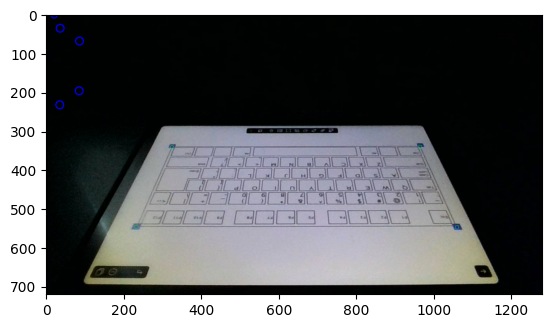

In [92]:
# Iterate over each coordinate and draw a circle around it
image_annotated = image.copy()
for coord in keyboard_segmentation.red_coordinates:
    x, y = coord
    radius = 5
    
    # Draw circle around the point
    cv2.circle(image_annotated, (x, y), radius, (0, 255, 0), 1)  # green color
    
    # Print the coordinate points for reference
    print(f"Circle centered at ({x}, {y}) with radius {radius}")
plt.imshow(image_annotated)

projected_point=(899, 223)


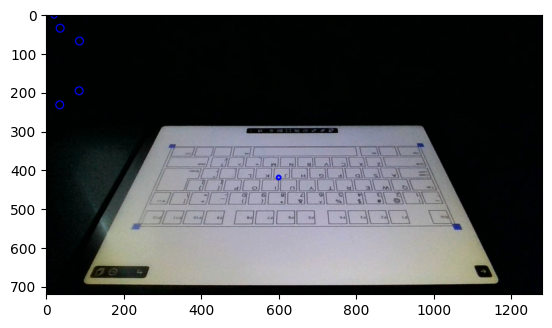

'J'

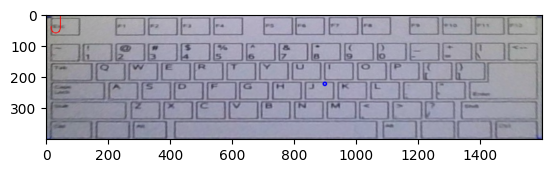

In [93]:
finger_point = (600, 420)
projected_point = keyboard_segmentation.project_point(finger_point)
print(f"{projected_point=}")
image_annotated = image.copy()
keyboard_image_annotated = keyboard_image.copy()

radius = 5
thickness = 3
color = (0, 0, 255)  # Red
cv2.circle(image_annotated, finger_point, radius, color, thickness)
cv2.circle(keyboard_image_annotated, projected_point, radius, color, thickness)
position = (10, 60)  # Top-left corner (x, y)
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 3
color = (255, 0, 0)  # Red color in BGR
thickness = 2

keyboard_layout_obj = Keyboard_Layout((keyboard_segmentation.homography_width,
                                            keyboard_segmentation.homography_height))
key = keyboard_layout_obj.get_key_by_index(*projected_point)
key.key_name

# Add text on top-left corner of the image
keyboard_image_annotated = cv2.putText(keyboard_image_annotated, key.key_name, position, font, font_scale, color, thickness)

plt.imshow(image_annotated)
plt.show()
plt.imshow(keyboard_image_annotated)
key.key_name

In [55]:
keyboard_segmentation.homography_height

400

In [ ]:
gray_image = cv2.cvtColor(keyboard_image, cv2.COLOR_BGR2GRAY)
white_intensity = float(np.sum(gray_image) / (255.0 * gray_image.size))
white_intensity

0.6078303799019608

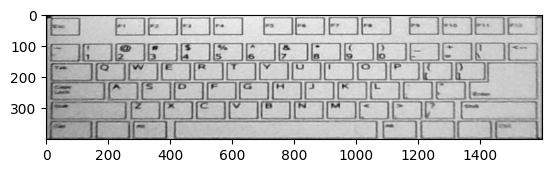

In [ ]:
plt.imshow(gray_image, cmap='gray')